Import Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
ccs_df = pd.read_csv('/home/lbarbut/data/ccs/CCS-Publication-V3/METLIN_IMS_all plot CV %3C2% _dimers.csv')
ccs_df

,Molecule Name,Molecular Formula,METLIN ID,Precursor Adduct,CCS1,CCS2,CCS3,CCS_AVG,% CV,m/z,...,m/z.1,Dimer,Dimer.1,dimer line,CCS,m/z.2,pubChem,inchi,smiles,InChIKEY
0,"3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...",C19H22FN3O,1181481.0,328.1820[M+H],176.63,176.63,176.63,176.63,0.0,328.1820,...,328.1820,209.886594,Monomer,NaN,135.0,50.0,25345055,InChI=1S/C19H22FN3O/c20-17-8-6-15(7-9-17)14-22...,O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2,DWYWDNMZIWKHFM-UHFFFAOYSA-N
1,"3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...",C22H15FO3S,1191359.0,379.0799[M+H],192.26,192.26,192.26,192.26,0.0,379.0799,...,379.0799,223.588309,Monomer,NaN,310.0,700.0,NaN,InChI=1S/C22H15FO3S/c23-19-10-11-21-20(13-19)2...,Fc1ccc2c(c1)C(=O)C(=Cc1ccc(cc1)c1ccccc1)CS2(=O)=O,MFNGEIZTLYGVQK-UHFFFAOYSA-N
2,"1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...",C25H28N4O3,1228206.0,433.2234[M+H],211.12,211.12,211.12,211.12,0.0,433.2234,...,433.2234,238.163739,Monomer,NaN,NaN,NaN,17541371,InChI=1S/C25H28N4O3/c1-31-21-10-8-19(9-11-21)2...,COc1ccc(cc1)c1noc(n1)CN1CCN(CC1)C(=O)C1(CCC1)c...,YPHGAJRHIVSPSX-UHFFFAOYSA-N
3,3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...,C22H30N4O5S,1176932.0,463.2010[M+H],204.22,204.22,204.22,204.22,0.0,463.2010,...,463.2010,246.233709,Monomer,NaN,NaN,NaN,16295966,InChI=1S/C22H30N4O5S/c27-19(16-26-20(28)22(23-...,O=C(N1CCN(CC1)S(=O)(=O)Cc1ccccc1)CN1C(=O)NC2(C...,ALHVXFHLDXYEII-UHFFFAOYSA-N
4,"2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...",C18H20N2O2,1183857.0,297.1598[M+H],174.47,174.47,174.47,174.47,0.0,297.1598,...,297.1598,201.535418,Monomer,NaN,NaN,NaN,17463671,InChI=1S/C18H20N2O2/c21-18(20-10-12-22-13-11-2...,O=C(N1CCOCC1)CNc1ccccc1c1ccccc1,YWINZXNEVGTFAX-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N
65284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3825,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N
65285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61457,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N
65286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N


Debug Mode

In [11]:
debug_mode = True
if debug_mode:
    # Keep only the first 1000 rows
    ccs_df = ccs_df.iloc[:1000]

    # Reset the index (optional)
    ccs_df = ccs_df.reset_index(drop=True)


Data Preprocessing

In [12]:
# drop NaN Precusor Adduct rows
ccs_df = ccs_df.dropna(subset=['Precursor Adduct'])

# remove the m/z number before the Precursor Adduct since the info is also in m/z column
ccs_df.loc[:, 'Precursor Adduct'] = ccs_df['Precursor Adduct'].str.replace(r'[0-9.]+', '', regex=True)

# remove [M+Na] rows
ccs_df = ccs_df[ccs_df['Precursor Adduct'] != '[M+Na]']

# change [M+H] to [M+H]+ and [M-H] to [M-H]-
ccs_df["Precursor Adduct"] = ccs_df["Precursor Adduct"].replace({
    "[M+H]": "[M+H]+",
    "[M-H]": "[M-H]-"
})

In [13]:
print(ccs_df['Precursor Adduct'].value_counts())

Precursor Adduct
[M+H]+    1000
Name: count, dtype: int64


In [14]:
from rdkit import Chem

In [15]:
def is_valid_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles) is not None  # True if valid, False if invalid
    except Exception:
        return False

In [16]:
# # drop smiles strings of '--'
# ccs_df = ccs_df[ccs_df["smiles"] != "--"]

# Apply validation
ccs_df["smiles_is_valid"] = ccs_df["smiles"].apply(is_valid_smiles)

invalid_smiles = ccs_df.loc[~ccs_df["smiles_is_valid"], "smiles"]  # Select invalid SMILES
print("Invalid SMILES strings:")
print(invalid_smiles.tolist())

# Filter out invalid SMILES
ccs_df = ccs_df[ccs_df["smiles_is_valid"]].drop(columns=["smiles_is_valid"]).reset_index(drop=True)





Invalid SMILES strings:
['--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--']


[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error while parsing: --
[10:23:51] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[10:23:51] SMILES Parse Error: syntax error whil

In [17]:
# drop NaN CCS_AVG rows
ccs_df = ccs_df.dropna(subset=['CCS_AVG'])
ccs_df.shape
ccs_df

,Molecule Name,Molecular Formula,METLIN ID,Precursor Adduct,CCS1,CCS2,CCS3,CCS_AVG,% CV,m/z,...,m/z.1,Dimer,Dimer.1,dimer line,CCS,m/z.2,pubChem,inchi,smiles,InChIKEY
0,"3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...",C19H22FN3O,1181481.0,[M+H]+,176.63,176.63,176.63,176.63,0.000000,328.1820,...,328.1820,209.886594,Monomer,NaN,135.0,50.0,25345055,InChI=1S/C19H22FN3O/c20-17-8-6-15(7-9-17)14-22...,O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2,DWYWDNMZIWKHFM-UHFFFAOYSA-N
1,"3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...",C22H15FO3S,1191359.0,[M+H]+,192.26,192.26,192.26,192.26,0.000000,379.0799,...,379.0799,223.588309,Monomer,NaN,310.0,700.0,NaN,InChI=1S/C22H15FO3S/c23-19-10-11-21-20(13-19)2...,Fc1ccc2c(c1)C(=O)C(=Cc1ccc(cc1)c1ccccc1)CS2(=O)=O,MFNGEIZTLYGVQK-UHFFFAOYSA-N
2,"1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...",C25H28N4O3,1228206.0,[M+H]+,211.12,211.12,211.12,211.12,0.000000,433.2234,...,433.2234,238.163739,Monomer,NaN,NaN,NaN,17541371,InChI=1S/C25H28N4O3/c1-31-21-10-8-19(9-11-21)2...,COc1ccc(cc1)c1noc(n1)CN1CCN(CC1)C(=O)C1(CCC1)c...,YPHGAJRHIVSPSX-UHFFFAOYSA-N
3,3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...,C22H30N4O5S,1176932.0,[M+H]+,204.22,204.22,204.22,204.22,0.000000,463.2010,...,463.2010,246.233709,Monomer,NaN,NaN,NaN,16295966,InChI=1S/C22H30N4O5S/c27-19(16-26-20(28)22(23-...,O=C(N1CCN(CC1)S(=O)(=O)Cc1ccccc1)CN1C(=O)NC2(C...,ALHVXFHLDXYEII-UHFFFAOYSA-N
4,"2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...",C18H20N2O2,1183857.0,[M+H]+,174.47,174.47,174.47,174.47,0.000000,297.1598,...,297.1598,201.535418,Monomer,NaN,NaN,NaN,17463671,InChI=1S/C18H20N2O2/c21-18(20-10-12-22-13-11-2...,O=C(N1CCOCC1)CNc1ccccc1c1ccccc1,YWINZXNEVGTFAX-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2-(4-chlorophenoxy)-N-(2-difluoromethanesulfon...,C17H16ClF2NO4S,1099977.0,[M+H]+,188.55,188.36,188.55,188.49,0.058198,404.0529,...,404.0529,230.311041,Monomer,NaN,NaN,NaN,8916818,"InChI=1S/C17H16ClF2NO4S/c1-17(2,25-12-9-7-11(1...",Clc1ccc(cc1)OC(C(=O)Nc1ccccc1S(=O)(=O)C(F)F)(C)C,VWCIEOFWZPOXBN-UHFFFAOYSA-N
913,"N-(3-methoxyphenyl)-2,8-dimethyl-1H,3H,4H,4aH,...",C21H25N3O2,1229478.0,[M+H]+,188.50,188.31,188.31,188.37,0.058235,352.2020,...,352.2020,216.352778,Monomer,NaN,NaN,NaN,24243858,InChI=1S/C21H25N3O2/c1-14-7-8-19-17(11-14)18-1...,COc1cccc(c1)NC(=O)N1C2CCN(CC2c2c1ccc(c2)C)C,RVMYKIPAAHCWTF-UHFFFAOYSA-N
914,"2-[(4,5-dicyclopropyl-1,2,4-triazol-3-yl)sulfa...",C19H24N6OS,1186825.0,[M+H]+,188.50,188.31,188.31,188.37,0.058235,385.1805,...,385.1805,225.230591,Monomer,NaN,NaN,NaN,8649548,InChI=1S/C19H24N6OS/c26-17(24-11-9-23(10-12-24...,O=C(N1CCN(CC1)c1ccccn1)CSc1nnc(n1C1CC1)C1CC1,NSNHTCPJKNSJOC-UHFFFAOYSA-N
915,N-(4-chloro-2-methylphenyl)-4-(pyrrolidine-1-s...,C17H19ClN2O4S2,1114213.0,[M+H]+,198.20,198.20,198.40,198.27,0.058239,415.0548,...,415.0548,233.272752,Monomer,NaN,NaN,NaN,8498027,InChI=1S/C17H19ClN2O4S2/c1-13-12-14(18)4-9-17(...,Clc1ccc(c(c1)C)NS(=O)(=O)c1ccc(cc1)S(=O)(=O)N1...,GPDNIJZPVIRQJT-UHFFFAOYSA-N


In [18]:
ccs_df["Instrument_type"] = "timsTOF"

In [19]:
ccs_df['CE'] = -1

In [20]:
# Create Metabolite column

from fiora.MOL.Metabolite import Metabolite
from fiora.GNN.AtomFeatureEncoder import AtomFeatureEncoder
from fiora.GNN.BondFeatureEncoder import BondFeatureEncoder
from fiora.GNN.SetupFeatureEncoder import SetupFeatureEncoder

CE_upper_limit = 100.0
weight_upper_limit = 1000.0

ccs_df["Metabolite"] = ccs_df["smiles"].apply(Metabolite)
ccs_df["Metabolite"].apply(lambda x: x.create_molecular_structure_graph())

node_encoder = AtomFeatureEncoder(feature_list=["symbol", "num_hydrogen", "ring_type"])
bond_encoder = BondFeatureEncoder(feature_list=["bond_type", "ring_type"])
setup_encoder = SetupFeatureEncoder(feature_list=["collision_energy", "molecular_weight", "precursor_mode", "instrument"])
rt_encoder = SetupFeatureEncoder(feature_list=["molecular_weight", "precursor_mode", "instrument"])

setup_encoder.normalize_features["collision_energy"]["max"] = CE_upper_limit 
setup_encoder.normalize_features["molecular_weight"]["max"] = weight_upper_limit 
rt_encoder.normalize_features["molecular_weight"]["max"] = weight_upper_limit 

ccs_df["Metabolite"].apply(lambda x: x.compute_graph_attributes(node_encoder, bond_encoder))

# df["summary"] = df.apply(lambda x: {key: x[name] for key, name in metadata_key_map.items()}, axis=1)
# ccs_df.apply(lambda x: x["Metabolite"].add_metadata(x["summary"], setup_encoder, rt_encoder), axis=1)
# ccs_df.apply(lambda x: x["Metabolite"].set_loss_weight(x["loss_weight"]), axis=1)

[10:23:54] WARNING: not removing hydrogen atom without neighbors
[10:23:54] WARNING: not removing hydrogen atom without neighbors
[10:23:54] WARNING: not removing hydrogen atom without neighbors
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] WARNING: Omitted undefined stereo

[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGenerator
[10:23:54] DEPRECATION WARNING: please use MorganGe

0      None
1      None
2      None
3      None
4      None
       ... 
912    None
913    None
914    None
915    None
916    None
Name: Metabolite, Length: 917, dtype: object

In [21]:
print("Assign unique metabolite identifiers.")
print("Unique smiles: " + str(len(ccs_df["smiles"].unique())))

metabolite_id_map = {}
for metabolite in ccs_df["Metabolite"]:
    is_new = True
    for id, other in metabolite_id_map.items():
        if metabolite == other:
            metabolite.set_id(id)
            is_new = False
            break
    if is_new:
        new_id = len(metabolite_id_map)
        metabolite.id = new_id
        metabolite_id_map[new_id] = metabolite

ccs_df["group_id"] = ccs_df["Metabolite"].apply(lambda x: x.get_id())
ccs_df["num_per_group"] = ccs_df["group_id"].map(ccs_df["group_id"].value_counts())

for i, data in ccs_df.iterrows():
    data["Metabolite"].set_loss_weight(1.0 / data["num_per_group"])
ccs_df["loss_weight"] = ccs_df["Metabolite"].apply(lambda x: x.loss_weight)
print(f"Found {len(metabolite_id_map)} unique molecular structures.")

def print_df_stats(df):
    num_spectra = df.shape[0]
    num_ids = len(df["group_id"].unique())
    
    print(f"Dataframe stats: {num_spectra} spectra covering {num_ids} unique structures")

print_df_stats(ccs_df)

Assign unique metabolite identifiers.
Unique smiles: 917
Found 917 unique molecular structures.
Dataframe stats: 917 spectra covering 917 unique structures


In [22]:
ccs_df.apply(lambda x: x["Metabolite"].set_id(x["group_id"]) , axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
912    None
913    None
914    None
915    None
916    None
Length: 917, dtype: object

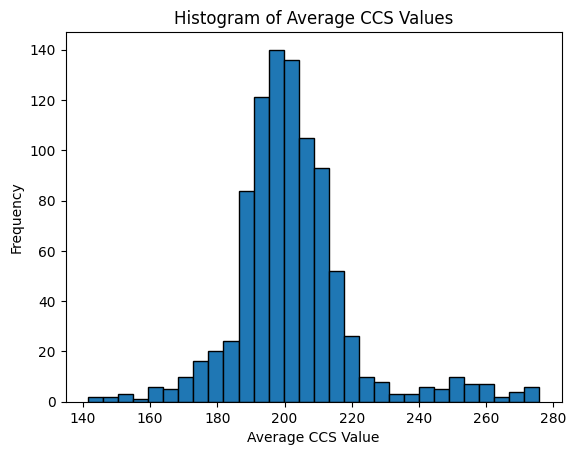

In [23]:
# Plot histogram of CCS_AVG column

plt.hist(ccs_df['CCS_AVG'], bins=30, edgecolor='black')
plt.xlabel('Average CCS Value')
plt.ylabel('Frequency')
plt.title('Histogram of Average CCS Values')
plt.show()

Predict CCS Values

In [24]:
import json
from fiora.GNN.GNNModules import GNNCompiler
from fiora.MS.SimulationFramework import SimulationFramework

In [25]:
# Load best model

dev="cuda:0"
#MODEL_PATH = f"{home}/data/metabolites/pretrained_models/pre_package/v0.0.1_merged_depth6_Jan24.pt"
MODEL_PATH = "/home/lbarbut/models_outside_fiora/ccs_models/v0.0.1_merged_depth6_Aug24_sqrt+CCS+RT_drop3.pt" # New sqrt model (improved)

try:
    model = GNNCompiler.load_from_state_dict(MODEL_PATH)
    print("Model loaded from state dict without errors.")
except:
    raise NameError("Error: Failed loading from state dict.")
        

model.eval()
model = model.to(dev)

model.model_params

Model loaded from state dict without errors.


{'param_tag': 'default',
 'gnn_type': 'RGCNConv',
 'depth': 6,
 'hidden_dimension': 300,
 'dense_layers': 2,
 'embedding_aggregation': 'concat',
 'embedding_dimension': 300,
 'input_dropout': 0.2,
 'latent_dropout': 0.1,
 'node_feature_layout': {'symbol': 10, 'num_hydrogen': 5, 'ring_type': 5},
 'edge_feature_layout': {'bond_type': 4, 'ring_type': 5},
 'static_feature_dimension': 9,
 'static_rt_feature_dimension': 8,
 'output_dimension': 10,
 'atom_features': ['bond_type', 'ring_type'],
 'setup_features': ['collision_energy',
  'molecular_weight',
  'precursor_mode',
  'instrument'],
 'rt_features': ['molecular_weight', 'precursor_mode', 'instrument'],
 'training_label': 'compiled_probsALL',
 'rt_supported': True,
 'ccs_supported': True}

In [26]:
spectral_modules = ["node_embedding", "edge_embedding", "GNN_module", "edge_module", "precursor_module", "RT_module"]


for module in spectral_modules:
    model.freeze_submodule(module)

In [27]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: requires gradients")
    # else:
    #     print(f"{name}: does not require gradients (frozen)")

CCS_module.dense_layers.0.weight: requires gradients
CCS_module.dense_layers.0.bias: requires gradients
CCS_module.dense_layers.1.weight: requires gradients
CCS_module.dense_layers.1.bias: requires gradients
CCS_module.output_layer.weight: requires gradients
CCS_module.output_layer.bias: requires gradients


In [28]:
metadata_key = { "collision_energy":  "CE", 
                 "instrument": "Instrument_type",
                 "precursor_mz": "m/z", 
                 'precursor_mode': "Precursor Adduct",
                 }

ccs_df["summary"] = ccs_df.apply(lambda x: {key: x[name] for key, name in metadata_key.items()}, axis=1)
ccs_df.apply(lambda x: x["Metabolite"].add_metadata(x["summary"], setup_encoder, rt_encoder), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_loss_weight(x["loss_weight"]), axis=1)

geo_data = ccs_df["Metabolite"].apply(lambda x: x.as_geometric_data(with_labels=False).to(dev)).values

Prediction

In [29]:
fiora = SimulationFramework(None, dev=dev, with_RT=True, with_CCS=True)
fiora.pred_all(ccs_df, model)

True
Prediction CCS: tensor(191.9465, device='cuda:0')
Prediction CCS: tensor(191.9459, device='cuda:0')
Prediction CCS: tensor(208.1397, device='cuda:0')
Prediction CCS: tensor(213.6994, device='cuda:0')
Prediction CCS: tensor(171.2999, device='cuda:0')
Prediction CCS: tensor(174.5250, device='cuda:0')
Prediction CCS: tensor(209.3943, device='cuda:0')
Prediction CCS: tensor(203.9404, device='cuda:0')
Prediction CCS: tensor(187.0277, device='cuda:0')
Prediction CCS: tensor(209.4422, device='cuda:0')
Prediction CCS: tensor(176.4288, device='cuda:0')
Prediction CCS: tensor(185.7580, device='cuda:0')
Prediction CCS: tensor(231.1653, device='cuda:0')
Prediction CCS: tensor(194.5920, device='cuda:0')
Prediction CCS: tensor(231.7188, device='cuda:0')
Prediction CCS: tensor(183.2510, device='cuda:0')
Prediction CCS: tensor(202.0545, device='cuda:0')
Prediction CCS: tensor(195.5816, device='cuda:0')
Prediction CCS: tensor(152.0348, device='cuda:0')
Prediction CCS: tensor(235.3944, device='cuda

In [30]:
ccs_df['CCS_pred'] = ccs_df["Metabolite"].apply(lambda x: x.CCS_pred)

In [31]:
ccs_df['CCS_pred']

0      tensor(191.9465, device='cuda:0')
1      tensor(191.9459, device='cuda:0')
2      tensor(208.1397, device='cuda:0')
3      tensor(213.6994, device='cuda:0')
4      tensor(171.2999, device='cuda:0')
                     ...                
912    tensor(187.3998, device='cuda:0')
913    tensor(201.0114, device='cuda:0')
914    tensor(195.6432, device='cuda:0')
915    tensor(190.1264, device='cuda:0')
916    tensor(205.2630, device='cuda:0')
Name: CCS_pred, Length: 917, dtype: object

Measure MSE of predicted and experimental values

In [32]:
mse = 0

mse = ((ccs_df['CCS_AVG'] - ccs_df['CCS_pred'].apply(lambda x: x.item()))**2).mean()
print(mse)


375.1229335387135


In [33]:
# import torch
# from fiora.GNN.Trainer import Trainer

In [34]:
# loss_fn = torch.nn.MSELoss() 

# rt_epochs = 500 # 300
# rt_batch = 64 #128
# rt_lr = 0.005

# def train_rt_model(rt_lr=rt_lr, rt_batch=rt_batch, rt_epochs=rt_epochs):        
#     y_label = 'compiled_probsALL'
#     optimizer = torch.optim.Adam(model.parameters(), lr=rt_lr)
#     train_keys, val_keys = ccs_df[ccs_df["dataset"] == "training"]["group_id"].unique(), ccs_df[ccs_df["dataset"] == "validation"]["group_id"].unique()
#     trainer = Trainer(geo_data, y_tag=y_label, problem_type="regression", train_keys=train_keys, val_keys=val_keys, metric_dict=None, split_by_group=True, seed=seed, device=dev)
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 8, factor=0.8, mode = 'min', verbose = True)
#     checkpoints = trainer.train(model, optimizer, loss_fn, scheduler=scheduler, batch_size=rt_batch, epochs=rt_epochs, val_every_n_epochs=1, with_CCS=True, with_RT=True, rt_metric=True, masked_validation=False, tag=tag) #, mask_name="compiled_validation_maskALL")   

#     return model, checkpoints

In [35]:
# model.set_dropout_rate(input_dropout=0.5, latent_dropout=0.5)

# model, cp = train_rt_model()